In [1]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(uci_path, header = 0)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
X = df.iloc[:, :]
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [7]:
from sklearn import cluster

kmeans = cluster.KMeans(init = 'k-means++', n_clusters = 5, n_init = 10)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
cluster_label = kmeans.labels_
print(kmeans.labels_)

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 0 4 3 3 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 2 3 3 0 0 3 3 0 0 2 3 0 0 3 2 3 3 0 2 0 3 0 0 0 0 0 3
 3 0 0 3 0 0 0 3 3 0 3 2 2 0 0 0 0 0 2 0 3 0 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 4 0 4 0
 0 0 0 3 3 0 0 0 3 0 0 1 3 1 1 3 3 1 1 1 3 1 1 1 3 1 2 1 1 3 1 3 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 3 1 3 1 1 1 1 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 1 3
 1 3 3 1 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 4 1 1 1 1 1 3 1
 2 1 3 1 1 1 1 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 0 0 3 3 0 3 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]


In [11]:
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


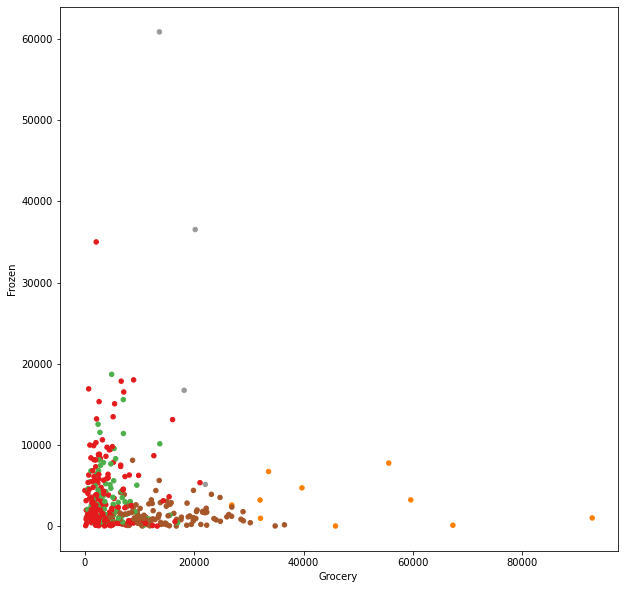

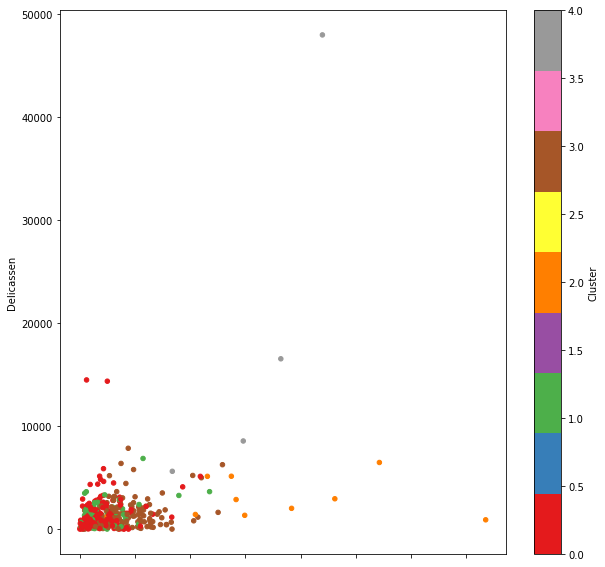

In [13]:
df.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1', colorbar = False, figsize = (10,10))
df.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1', colorbar = True, figsize = (10,10))
plt.show()
plt.close()

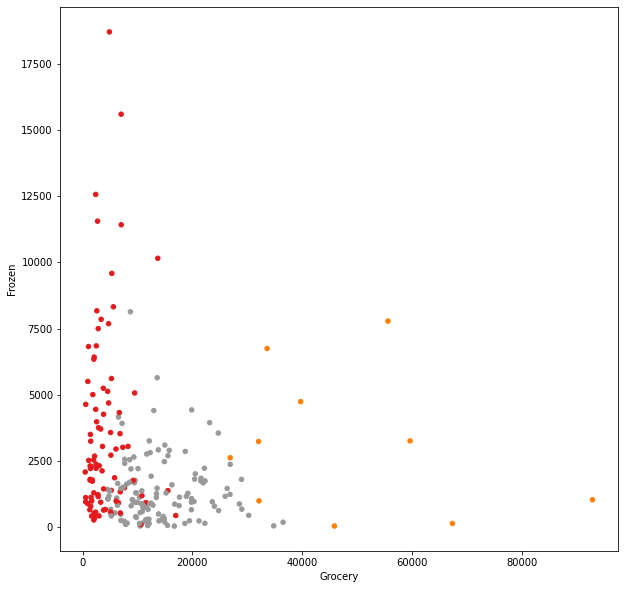

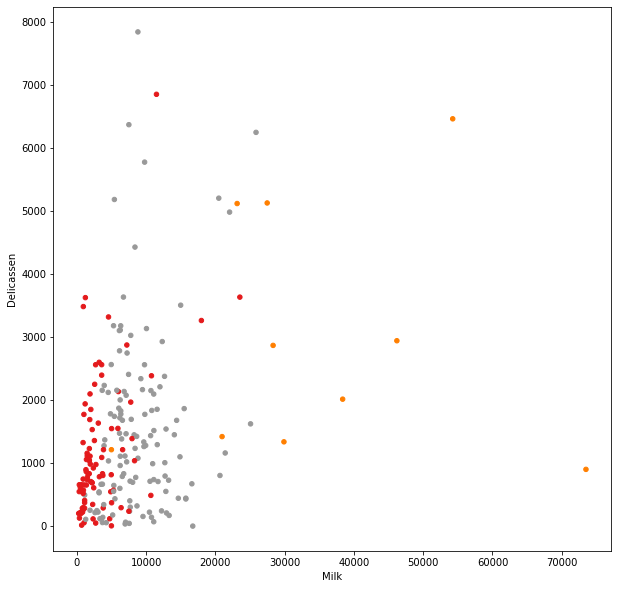

In [14]:
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)

ndf = df[~mask]

ndf.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1', colorbar = False, figsize = (10,10))
ndf.plot(kind = 'scatter', x = 'Milk', y = 'Delicassen', c = 'Cluster', cmap = 'Set1', colorbar = False, figsize = (10,10))
plt.show()
plt.close()

In [18]:
import pandas as pd
import folium
df = pd.read_excel('2016_middle_shcool_graduates_report.xlsx', header = 0, engine = 'openpyxl')

In [19]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

In [20]:
df.columns.values

array(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학',
       '취업', '미상', '위도', '경도'], dtype=object)

In [21]:
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,...,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,...,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,...,0.010,0,0.000,37.510750,127.008900


In [23]:
df.tail()

,Unnamed: 0,지역,학교명,코드,유형,...,기타진학,취업,미상,위도,경도
410,410,강남구,국립국악중학교,9,국립,...,0.000,0,0.000,37.476381,127.051355
411,411,금천구,국립전통예술중학교,9,국립,...,0.000,0,0.018,37.446354,126.906424
412,412,광진구,선화예술학교,9,사립,...,0.000,0,0.036,37.549642,127.087737
413,413,중구,예원학교,9,사립,...,0.048,0,0.031,37.566951,126.971553
414,414,노원구,한국삼육중학교,9,사립,...,0.029,0,0.000,37.641056,127.108344


In [24]:
df.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,...,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,...,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,...,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,...,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,...,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,...,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,...,1.000000,0.0,0.036000,37.694777,129.106974


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [28]:
mschool_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
  folium.CircleMarker([lat,lng],
                      radius = 5,
                      color = 'brown',
                      fill = True,
                      fill_color = 'coral',
                      fill_opacity = 0.7,
                      popup = name).add_to(mschool_map)

mschool_map.save('seoul_mschool_location.html')

In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])


df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]


In [32]:
from sklearn import cluster

columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X)

dbm = cluster.DBSCAN(eps = 0.2, min_samples=5)

dbm.fit(X)
cluster_label = dbm.labels_
print(cluster_label)

df['Cluster'] = cluster_label
df.head()

[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1 -1  6  3 -1  6 -1 -1 -1  0 -1  0 10 -1  0  0  0 -1  0 -1
 -1 -1 -1  9 -1 -1 10  0 10  0  7  7  3  6 -1 -1 -1 -1  3  4 -1  0 -1  8
  4  8  6  0  7 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1

,Unnamed: 0,지역,학교명,코드,유형,...,location,code,type,day,Cluster
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,16,0,1,0,-1
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,22,0,1,0,0
2,2,강남구,개원중학교,3,공립,...,0,0,0,0,-1
3,3,강남구,개포중학교,3,공립,...,0,0,0,0,-1
4,4,서초구,경원중학교,3,공립,...,14,0,0,0,1


In [35]:
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')

for key, group in grouped:
  print('*key : ',key)
  print('*number: ', len(group))
  print(group.iloc[:, grouped_cols].head())
  print('\n')


colors = {-1: 'gray', 0 : 'coral', 1 : 'blue', 2 : 'green', 3 : 'red', 4 : 'purple', 5 : 'orange', 6 : 'brown', 
          7 : 'brick', 8 : 'yellow', 9 : 'magenta', 10 : 'cyan', 11 : 'tan'}

cluster_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
  folium.CircleMarker([lat, lng],
                      radius = 5,
                      color = colors[clus],
                      fill = True,
                      fill_color = colors[clus],
                      fill_opacity = 0.7,
                      popup = name).add_to(cluster_map)

cluster_map.save('seoul_mschool_clust.html')

*key :  -1
*number:  234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


*key :  0
*number:  70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


*key :  1
*number:  7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  송파구

In [36]:
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


In [39]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

dbm2 = cluster.DBSCAN(eps = 0.2, min_samples = 5)
dbm2.fit(X2)
df['Cluster2'] = dbm2.labels_


grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')

for key, group in grouped2:
  print('* key : ', key)
  print('* number : ', len(group))
  print(group.iloc[:, grouped2_cols].head())



* key :  -1
* number :  238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0
* key :  0
* number :  70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0
* key :  1
* number :  7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
4            4  서초구     3     0.017   0.007         0.0     0
24          24  강남구     3     0.026   0.007         0.0     0
27          27  강남구     3     0.006 

In [40]:
cluster2_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain',
                          zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
  folium.CircleMarker([lat, lng], 
                      radius = 5,
                      color = colors[clus],
                      fill = True,
                      fill_colors = colors[clus],
                      fill_capacity = 0.7,
                      popup = name).add_to(cluster2_map)

cluster2_map.save('seoul_mschool_cluster2.html')